In [127]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [128]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [129]:
data_path = r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\day.csv"

In [130]:
df = pd.read_csv(r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\day.csv", encoding= 'unicode_escape')

# Linear Regression Model

In [131]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [132]:
# Drop unwanted columns
columns_to_drop = ['instant', 'casual', 'registered','dteday','atemp']
df = df.drop(columns=columns_to_drop)
print(f"Unwanted columns are: {columns_to_drop}")

Unwanted columns are: ['instant', 'casual', 'registered', 'dteday', 'atemp']


In [133]:
# Create weekend column (1 if weekend, 0 if not weekend)
df['weekend'] = ((df['weekday'] == 0) | (df['weekday'] == 6)).astype(int)
print("Created weekend column (1 for weekend, 0 for weekday)")

Created weekend column (1 for weekend, 0 for weekday)


In [134]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,weekend
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985,1
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801,1
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349,0
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562,0
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600,0


In [135]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
    '''
    Calculating VIF
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [136]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,season,3.541429
1,yr,1.020251
2,mnth,3.332130
3,holiday,2.284029
4,weekday,1.021463
5,workingday,33.713895
6,weathersit,1.741541
7,temp,1.215589
8,hum,1.905040
9,windspeed,1.165206


In [137]:
df = df.drop(columns=['weekend'])
df = df.drop(columns=['season'])

In [138]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,yr,1.946112
1,mnth,5.016516
2,holiday,1.098640
3,weekday,3.099372
4,workingday,3.263813
5,weathersit,13.069985
6,temp,8.593278
7,hum,25.447801
8,windspeed,5.296236


In [139]:
df = df.drop(columns=['hum'])

In [140]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['cnt']]])

,variables,VIF
0,yr,1.946053
1,mnth,4.573376
2,holiday,1.092664
3,weekday,3.085268
4,workingday,3.221616
5,weathersit,6.123932
6,temp,6.701484
7,windspeed,5.251681


In [141]:
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed,cnt
0,0,1,0,6,0,2,0.344167,0.160446,985
1,0,1,0,0,0,2,0.363478,0.248539,801
2,0,1,0,1,1,1,0.196364,0.248309,1349
3,0,1,0,2,1,1,0.200000,0.160296,1562
4,0,1,0,3,1,1,0.226957,0.186900,1600


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   windspeed   731 non-null    float64
 8   cnt         731 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 51.5 KB


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [144]:
# Creating a dependent variable for rented bike count
dependent_variable = 'cnt'

In [145]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['weathersit',
 'weekday',
 'temp',
 'mnth',
 'windspeed',
 'yr',
 'holiday',
 'workingday']

In [146]:
# Create the dependent variable data
y = np.sqrt(df['cnt'])

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [147]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [148]:
X_train[0:10]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed
97,0,4,0,5,1,2,0.335833,0.226992
503,1,5,0,5,1,1,0.564167,0.136817
642,1,10,0,4,1,2,0.657500,0.117546
498,1,5,0,0,0,1,0.612500,0.225117
303,0,10,0,1,1,1,0.340000,0.106350
570,1,7,0,2,1,1,0.750833,0.211454
250,0,9,0,4,1,3,0.633913,0.192748
17,0,1,0,2,1,2,0.216667,0.146775
595,1,8,0,6,0,1,0.678333,0.177867
240,0,8,0,1,1,1,0.636667,0.159825


In [149]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [150]:
joblib.dump(scaler, "lr_scaler.pkl")

['lr_scaler.pkl']

In [151]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 8)
(584,)
(147, 8)
(147,)


In [152]:
X_train[0:10]

array([[0.        , 0.27272727, 0.        , 0.83333333, 1.        ,
        0.5       , 0.35024023, 0.48605788],
       [1.        , 0.36363636, 0.        , 0.83333333, 1.        ,
        0.        , 0.63925722, 0.24873701],
       [1.        , 0.81818182, 0.        , 0.66666667, 1.        ,
        0.5       , 0.75739478, 0.19801995],
       [1.        , 0.36363636, 0.        , 0.        , 0.        ,
        0.        , 0.7004354 , 0.48112329],
       [0.        , 0.81818182, 0.        , 0.16666667, 1.        ,
        0.        , 0.35551467, 0.16855453],
       [1.        , 0.54545455, 0.        , 0.33333333, 1.        ,
        0.        , 0.87553235, 0.44516526],
       [0.        , 0.72727273, 0.        , 0.66666667, 1.        ,
        1.        , 0.72753921, 0.39593516],
       [0.        , 0.        , 0.        , 0.33333333, 1.        ,
        0.5       , 0.19940418, 0.27494429],
       [1.        , 0.63636364, 0.        , 1.        , 0.        ,
        0.        , 0.783764

In [153]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [154]:
regressor.coef_

array([ 15.04260128,   8.29933707,  -3.77313451,   3.0030927 ,
         1.07263707, -12.74702208,  35.99967589,  -8.46219177])

In [155]:
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

,Coefficient
yr,15.042601
mnth,8.299337
holiday,-3.773135
weekday,3.003093
workingday,1.072637
weathersit,-12.747022
temp,35.999676
windspeed,-8.462192


In [156]:
regressor.intercept_

np.float64(37.49175169903237)

In [157]:
regressor.score(X_train,y_train)

0.7527486446695919

In [158]:
y_pred_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

In [159]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 6.036141189603937.
The Mean Squred Error(MSE) is 65.03509469763652.
The Root Mean Squared Error(RMSE) is 8.064433935350733.
The R2 Score is 0.7710484012073313.
Adjusted R2 is 0.7577758447555825.


In [160]:
#Saving train data set results in dataframe.
test_dict = {'Model':"Linear Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [161]:
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,6.0361,65.0351,8.0644,0.771,0.7578


In [162]:
print(df.columns)

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'windspeed', 'cnt'],
      dtype='object')


In [163]:
import joblib
joblib.dump(regressor, "linear_regression.pkl")


['linear_regression.pkl']

In [164]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [165]:
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [166]:
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

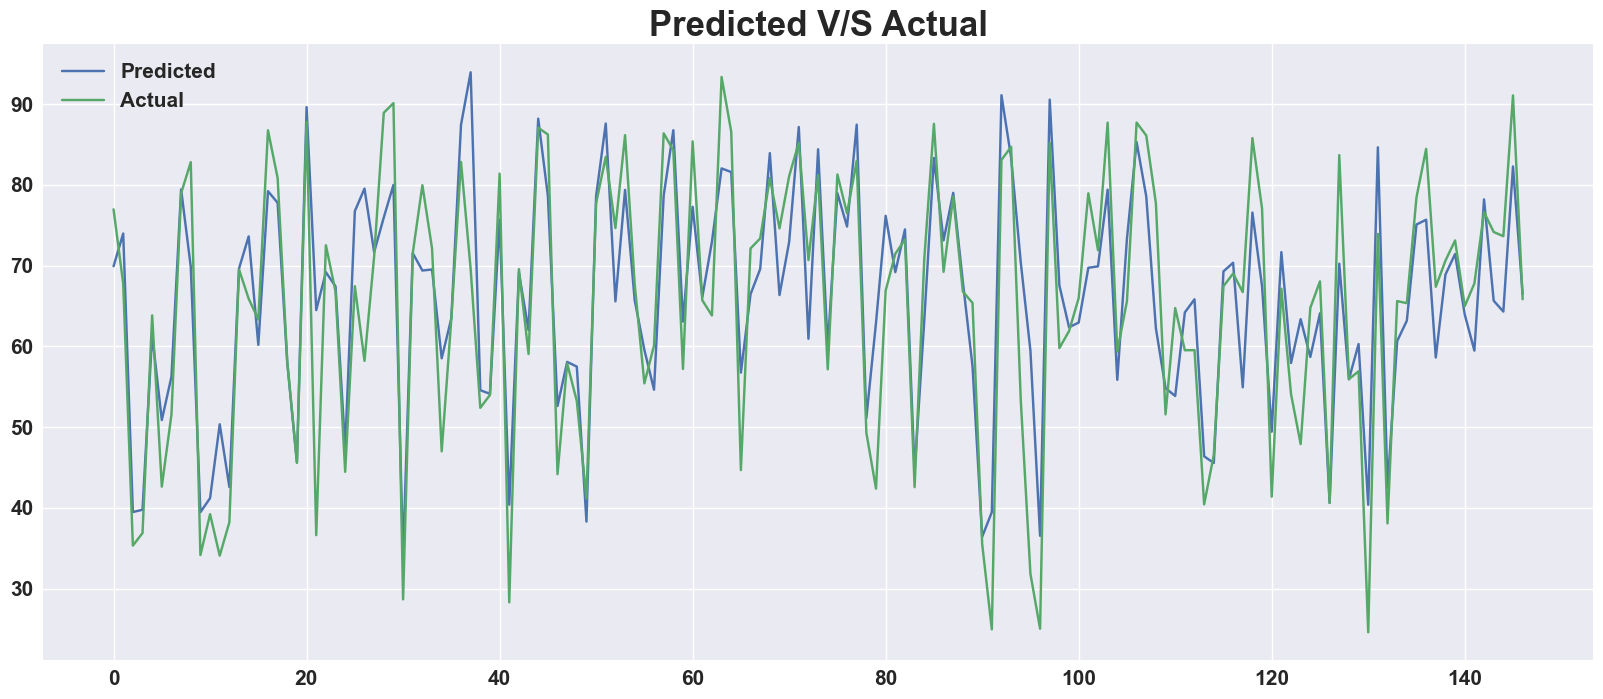

In [167]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

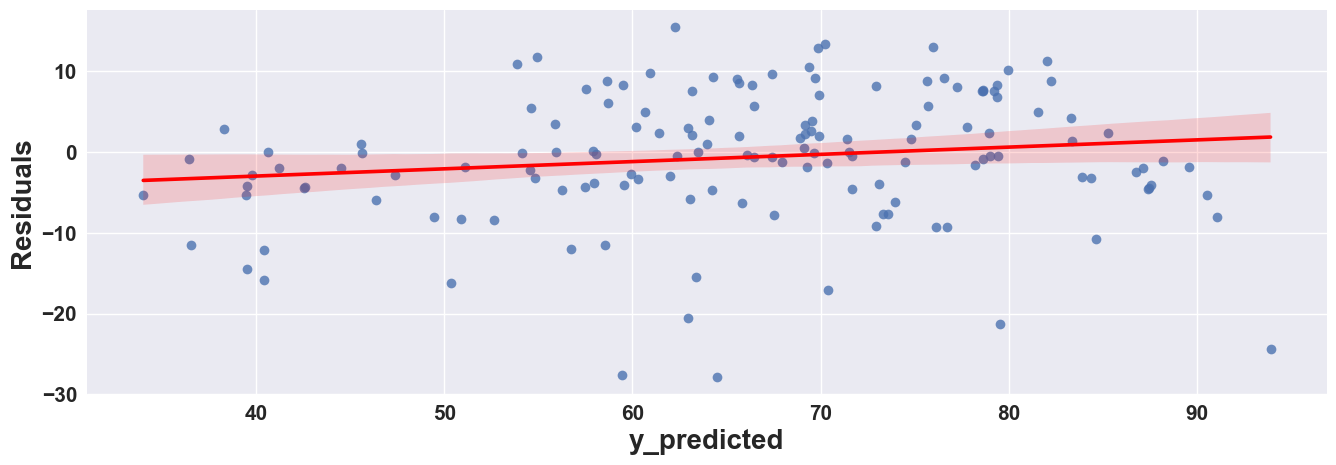

In [168]:
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred, y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

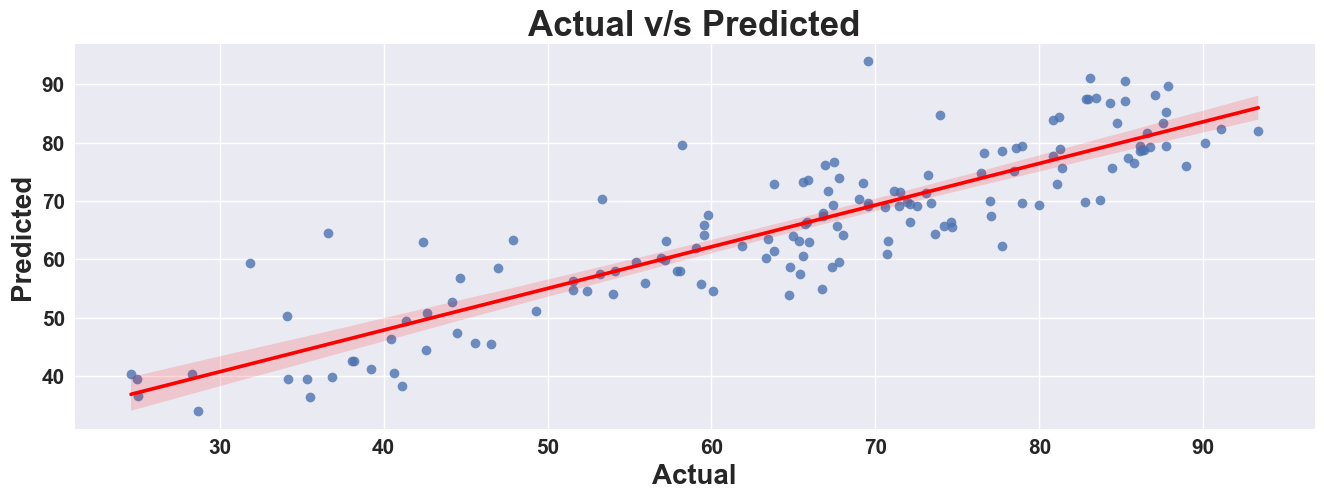

In [169]:
plot_scatter(y_pred,y_test)

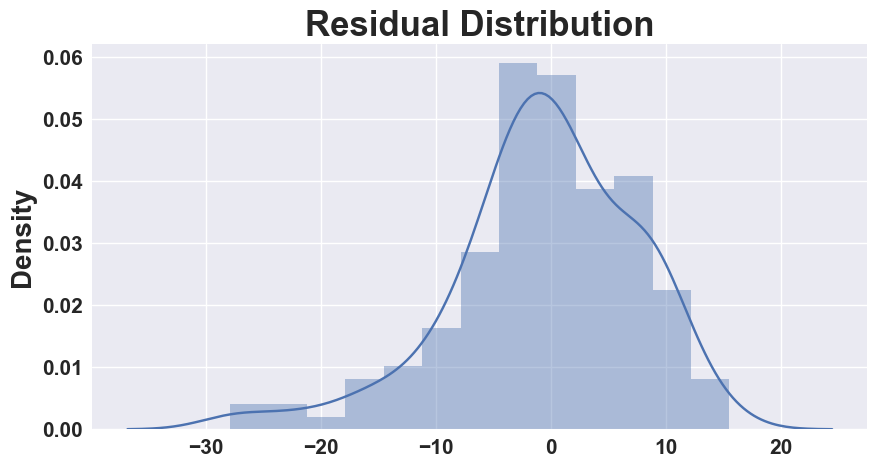

In [170]:
Residual_distPlot(y_pred,y_test)

### Linear Regression on new Dataset 

In [171]:
data_path = r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\day(new).csv"

In [172]:
df_new = pd.read_csv("D:\RideWise-Predicting-Bike-sharing-Demand\Data\day(new).csv")

In [173]:
import joblib
import pandas as pd

model = joblib.load("linear_regression.pkl")       # your trained model
scaler = joblib.load("lr_scaler.pkl")     # your fitted scaler


In [174]:
# Drop unwanted columns
columns_to_drop = ['instant', 'casual', 'registered','dteday','atemp']
df_new = df_new.drop(columns=columns_to_drop)
print(f"Unwanted columns are: {columns_to_drop}")

Unwanted columns are: ['instant', 'casual', 'registered', 'dteday', 'atemp']


In [178]:
# Create weekend column (1 if weekend, 0 if not weekend)
df_new['weekend'] = ((df_new['weekday'] == 0) | (df_new['weekday'] == 6)).astype(int)
print("Created weekend column (1 for weekend, 0 for weekday)")

Created weekend column (1 for weekend, 0 for weekday)


In [179]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,weekend
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,0
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,0
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,0


In [180]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
    '''
    Calculating VIF
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [184]:
Calculate_vif(df_new[[i for i in df_new.describe().columns if i not in ['cnt']]])

,variables,VIF
0,season,3.533222
1,yr,1.020927
2,mnth,3.325725
3,holiday,2.284460
4,weekday,1.021473
5,workingday,33.650138
6,weathersit,1.738609
7,temp,1.215146
8,hum,1.905125
9,windspeed,1.165212


In [185]:
df_new = df_new.drop(columns=['weekend'])
df_new = df_new.drop(columns=['season'])